# **Machine Learning Models**

Gerekli Kütüphaneler Entegre Edildi.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score, precision_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Veri Çerçevemizi Ekleyelim

In [2]:
df = pd.read_csv("../input/tablet/tablet.csv")

Veri Setimizde Bulunan Verilerden İlk 10 Verimize Göz Atalım.

In [3]:
df.head(10)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
5,1162,Yok,1.0,Yok,0.0,Yok,50,0.5,104,4,10,332,866,1404.0,15,Var,Var,Var,Ucuz,Beyaz
6,1849,Var,0.5,Yok,1.0,Yok,29,0.5,181,7,12,978,1986,3330.0,15,Var,Yok,Var,Pahalı,Gri
7,1860,Yok,0.5,Var,2.0,Var,55,0.7,83,6,3,195,799,676.0,4,Var,Yok,Var,Çok Ucuz,Beyaz
8,1536,Yok,0.8,Yok,12.0,Yok,13,0.3,105,7,20,22,1634,2020.0,16,Var,Var,Yok,Normal,Sarı
9,539,Var,0.6,Var,9.0,Yok,21,0.1,145,7,14,551,599,3597.0,9,Yok,Yok,Yok,Normal,Mavi


Veri Setimizde Bulunan Gözlem ve Öznitelik Sayımızı Görünteleyelim

In [4]:
df.shape #Görüldüğü Üzere 2000 Gözlem , 20 Öznitelikden Oluşmakta

(2000, 20)

Veri Setimiz Hakkında Detaylı Bilgi Almak İçin info Fonksiyonundan Yararlanıyoruz

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Daha Sonra Yararlanacak Olduğumuz, Veri Setimizin Sayısal Değerlerini Görüntüleyelim

In [6]:
df.describe().T #Burada Genel Yorumlarda Bulunabiliriz Ama Zaten İlerleyen Satırlarda "std" , "mean" Gibi Değerleri Detaylı İnceleyeceğiz.
#Bu Fonksiyonu Kullanarak Görüntülediğimiz Değişkenlerimiz, Veri Setimizin Sayısal, Yani Kategorik Olmayan Değişkenlerimizdir.

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Yukarıda Da Farketmiş Olabileceğiniz Üzere Bazı Gözlemlerde Eksiklikler Var, Bunu Kontrol Edelim.

In [7]:
df.isna().sum() #Sonuçta Da Görüldüğü Üzere, "OnKameraMP" ve "RAM" Gözlemlerinde Eksik Değerler Bulunmakta. 
#Eğer İhtiyaç Duyulursa, "unique" ve "nunique" Fonksiyonlarıyla Derinlemesine Eksik Veri Kontrolü Yapılabilir. 
#Ama Bu Veri Setimiz İçin Gerek Duymuyoruz.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Şimdi Kolerasyon Katsayımıza Bakarak Veriler Arasında Ki İlişkilerin Yönü ve Gücü Hakkında Bilgi Edinelim.

***Kolerasyon Katsayısı : İki Değişken Arasındaki Doğrusal İlişkinin Yönünü ve Gücünü Belirtir.***

In [8]:
corr = df.corr()
corr
#Kolerasyon Katsayısı +1 E Ne Kadar Yakınsa, İki Değişken Arasında O Kadar Pozitif Yönde Güçlü Bir İlişki Vardır.
#Kolerasyon Katsayısı -1 E Ne Kadar Yakınsa, İki Değişken Arasında O Kadar Negatif Yönde Güçlü Bir İlişki Vardır.
#Örneğin "Batarya Gücü" ve "Batarya Ömrü" Arasında Pozitif Yönlü Bir İlişki Vardır.

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Kolerasyon İlişkisini Isı Haritasıyla Görselleştirelim ve Daha Anlaşılabilir Kılalım.


<AxesSubplot:>

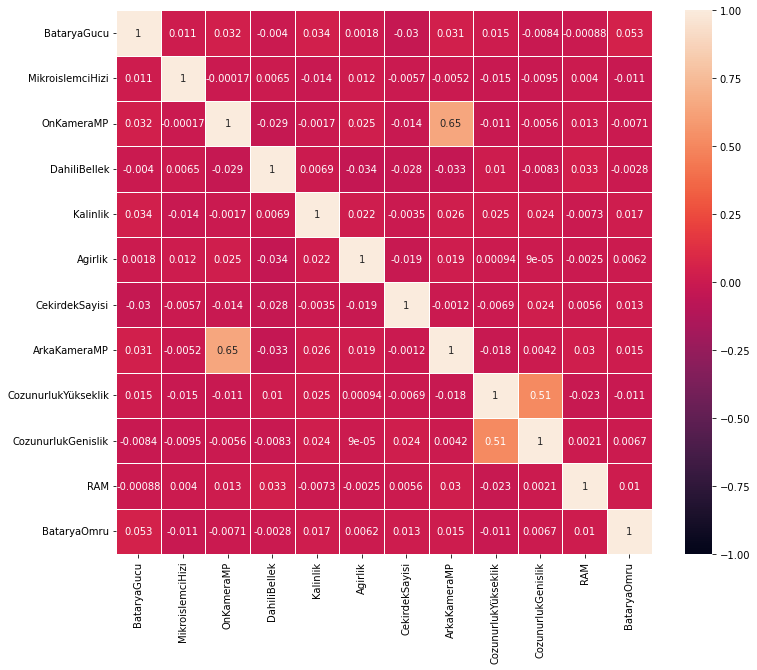

In [9]:
plt.subplots(figsize=(12, 10))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            vmin = -1 , vmax = 1, annot = True, linewidths = 1)
#Buradan Daha Rahat Görülüyor Ki, "Ön Kamera MP" ve "Arka Kamera MP" Arasında Pozitif Güçlü Bir İlişki Var. Aynı Durum "Çözünürlük" Değerleri İçinde Geçerli.

Bu İlişkiyi Seaborn Araçlarıyla Daha Fazla Görselleştirelim 

<AxesSubplot:xlabel='ArkaKameraMP', ylabel='OnKameraMP'>

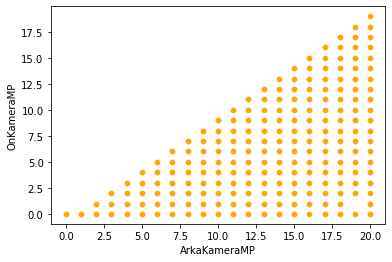

In [10]:
sns.scatterplot(y = 'OnKameraMP' , x = 'ArkaKameraMP' , data = df , color = 'orange') 
#Kolerasyon katsayısında da gözlemlediğimiz gibi "Ön Kamera" ve "Arka Kamera" arasında pozitif doğrusal ve güçlü bir ilişki var.

Tabletlerin Ön Kamerasının Hangi Değerde Yoğunlaştığına Bakalım

(<AxesSubplot:xlabel='OnKameraMP', ylabel='FiyatAraligi'>,)

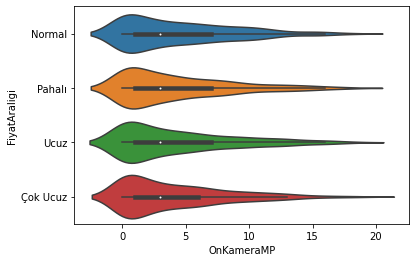

In [11]:
sns.violinplot(x = 'OnKameraMP' , y = 'FiyatAraligi' ,  data = df), #Tabletlerimizin Ön Kamerasının 0-5 MP Aralığında Yoğun Olduğunu Görüyoruz.

Şimdi De Çözünürlük Değişkenlerimiz Arasında Ki İlişkiyi Görselleştirelim.

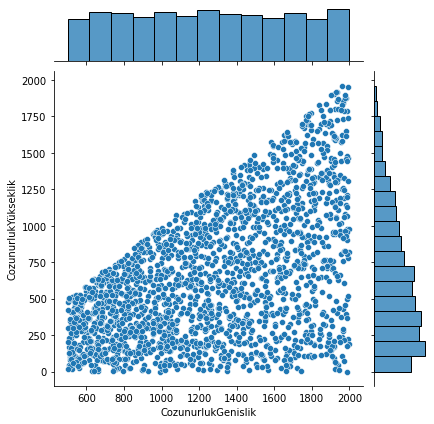

In [12]:
sns.jointplot(y = 'CozunurlukYükseklik' , x = 'CozunurlukGenislik' , data = df)
#Görüldüğü gibi iki değişken arasında doğrusal ve pozitif bir ilişki vardır.

Ön Kamera Değerimizi Daha Detaylı İnceleyerek, Standart Sapma, Ortalama Gibi Değerlerini Gözlemleyelim

In [13]:
df['OnKameraMP'].describe().T
#Ön Kamera Ortalaması "4.312281" , Standart Sapması "4.342095".

count    1995.000000
mean        4.312281
std         4.342095
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: OnKameraMP, dtype: float64

Verilerimizin Sayısal Değişken Ortalamalarını Fiyatlarına Göre Gruplayarak İnceleyelim

In [14]:
df.groupby(['FiyatAraligi']).mean()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
FiyatAraligi,,,,,,,,,,,,
Normal,1228.320,1.5298,4.498000,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.81600,10.972
Pahalı,1379.984,1.5204,4.316000,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.35041,11.098
Ucuz,1228.868,1.4886,4.340000,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.49000,11.362
Çok Ucuz,1116.902,1.5502,4.092929,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.31400,10.612


Veri Setimizdeki Sayısal Değerleri Topluca Görsel Olarak Görelim

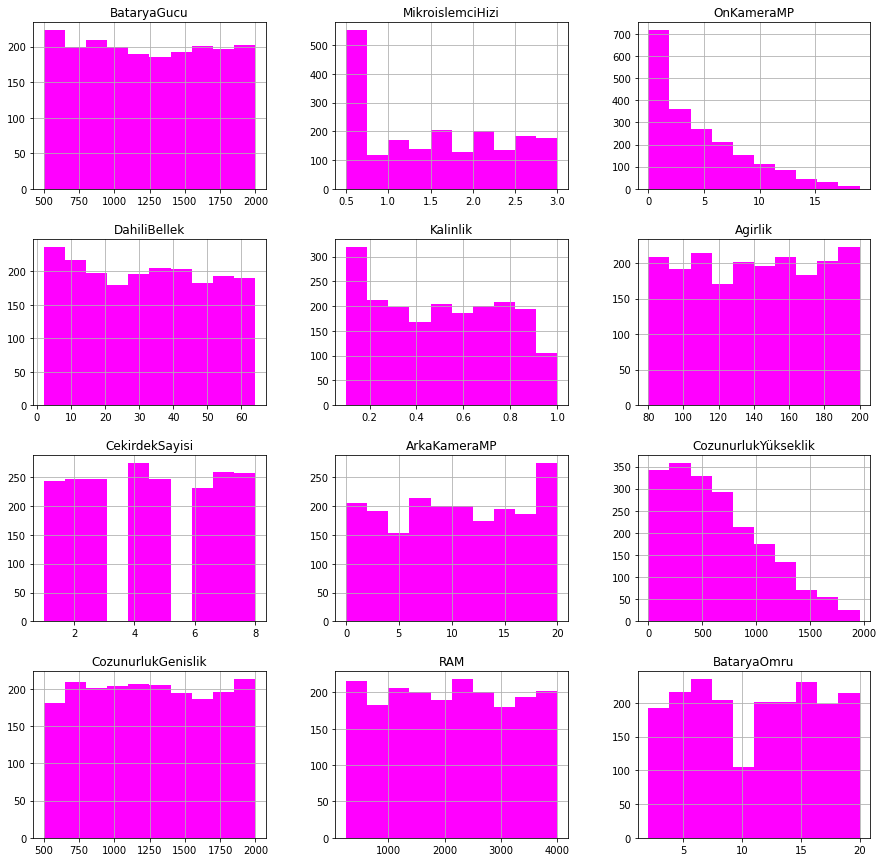

In [15]:
df.hist(figsize=(15,15),color = 'magenta');

Kategorik Değişkenlerimizden Olan "Renk" Değişkenimizin Durumunu Sayı Grafiği Çizdirerek Gözlemleyelim.

<AxesSubplot:xlabel='Renk', ylabel='count'>

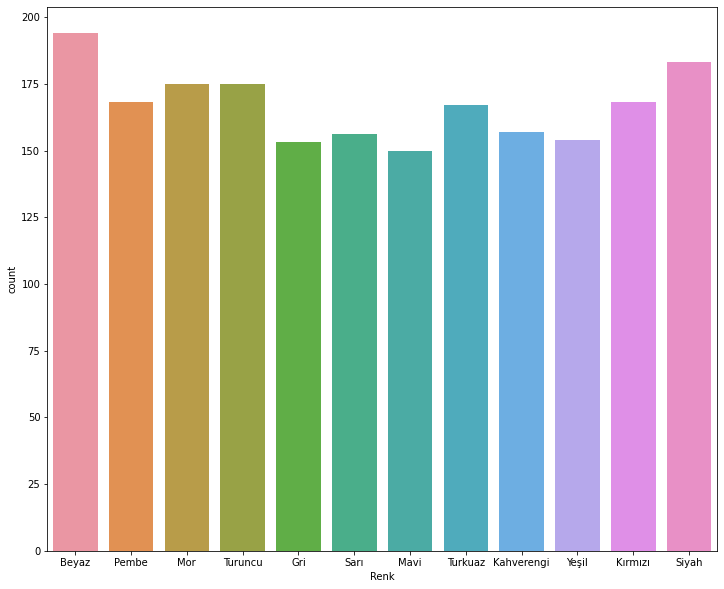

In [16]:
plt.subplots(figsize=(12, 10))
sns.countplot(x = 'Renk' , data = df)
#En çok beyaz renkli tabletimiz bulunmakta.

Renk değerlerimiz hedef değişkenimizi etkileyen bir öz nitelik olmadığı için, modelimizde kullanmayacağız. Veri setimizden çıkartabiliriz.


In [17]:
df.drop(['Renk'], axis=1,inplace=True)

# Eksik Verileri Dolduralım

Ön Kamera ve RAM değişkenlerimiz eksik değerlere sahipti.Bunları doldurucaz.

Ön Kamera Eksik Stünları Görelim

In [18]:
df[df["OnKameraMP"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz


Boş değerleri ön kamera değişkeninin ortalamasıyla doldurarak bu boşlukları anlamlı hale getirelim. Boş stünlardaki tabletlerimizin fiyat aralığının hep Çok Ucuz olduğunu görebiliyoruz. Bu yüzden "Çok Ucuz" tabletlerin Ön Kamera ortalama değeriyle doldurmamız gerekmekte

In [19]:
df.groupby("FiyatAraligi")[["OnKameraMP"]].mean()

,OnKameraMP
FiyatAraligi,
Normal,4.498000
Pahalı,4.316000
Ucuz,4.340000
Çok Ucuz,4.092929


Yukarda da gördüğümüz üzere "Çok Ucuz" etiketli tabletlerin Ön Kamera değerinin ortalaması "4.092929".

In [20]:
df.loc[df[(df["FiyatAraligi"] == "Çok Ucuz") & (df["OnKameraMP"].isnull())].index,"OnKameraMP"] = 4.092929

Bakalım eksik değerimiz kaldı mı 

In [21]:
df[df["OnKameraMP"].isnull()] #Kalmadığını Gözlemlemiş Olduk

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi


Şimdi de RAM değerimizin eksik stünlarını görünteleyelim ve bunları anlamlı değerler ile dolduralım.

In [22]:
df[df["RAM"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı


Şimdi RAM değerimizin Fiyatlara göre ortalamasını görelim. 

In [23]:
df.groupby("FiyatAraligi")[["RAM"]].mean()
#Tüm eksik RAM değerleri, Pahalı tabletlerde olduğu için, onun ortalamasını anlamlı değer olarak kullanacağız.

,RAM
FiyatAraligi,
Normal,2582.81600
Pahalı,3449.35041
Ucuz,1679.49000
Çok Ucuz,785.31400


In [24]:
df.loc[df[(df["FiyatAraligi"] == "Pahalı") & (df["RAM"].isnull())].index,"RAM"] = 3449.35041

Veri setimizde eksik verimiz kaldı mı diye kontrol edelim

In [25]:
df.isna().sum()
#Görüldüğü üzere tüm eksik veriler tamamlandı ve veri setimiz olması gerektiği hale geldi.

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
dtype: int64

> # ***Modeli eğitmeden önce kategorik değerlerimizi encoding ediyoruz.***

Encoder atamamızı yapıyoruz

In [26]:
enc=preprocessing.LabelEncoder()

Kategorik değerleri encoderlayalım

In [27]:
df['FiyatAraligi'] = enc.fit_transform(df['FiyatAraligi'])
df['Bluetooth'] = enc.fit_transform(df['Bluetooth'])
df['CiftHat'] = enc.fit_transform(df['CiftHat'])
df['4G'] = enc.fit_transform(df['4G'])
df['3G'] = enc.fit_transform(df['3G'])
df['WiFi'] = enc.fit_transform(df['WiFi'])
df['Dokunmatik'] = enc.fit_transform(df['Dokunmatik'])
df.head(10)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,1
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,2
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,1
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,0
5,1162,1,1.0,1,0.0,1,50,0.5,104,4,10,332,866,1404.0,15,0,0,0,2
6,1849,0,0.5,1,1.0,1,29,0.5,181,7,12,978,1986,3330.0,15,0,1,0,1
7,1860,1,0.5,0,2.0,0,55,0.7,83,6,3,195,799,676.0,4,0,1,0,3
8,1536,1,0.8,1,12.0,1,13,0.3,105,7,20,22,1634,2020.0,16,0,0,1,0
9,539,0,0.6,0,9.0,1,21,0.1,145,7,14,551,599,3597.0,9,1,1,1,0


# Artık Eğitim Aşamasına Geçebiliriz

# ***MODEL EĞİTİM VE GELİŞTİRME***

Bağımlı değişken olan Fiyat Aralığını "Y" atıyoruz, Diğer bağımsız değişkenlerimizi "X" e atıyoruz.

In [28]:
Y = df["FiyatAraligi"]
X = df.drop("FiyatAraligi", axis = 1)

In [29]:
Y

0       0
1       1
2       2
3       1
4       0
       ..
1995    3
1996    2
1997    1
1998    0
1999    0
Name: FiyatAraligi, Length: 2000, dtype: int64

In [30]:
X

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,1,2.9,0,3.0,0,7,0.8,147,2,6,487,722,1241.0,16,0,1,1
1996,1654,1,1.8,1,1.0,1,11,0.3,146,7,2,1184,1719,1070.0,14,0,0,0
1997,742,1,2.2,0,4.0,1,56,0.2,190,7,14,577,1359,3557.0,12,1,0,0
1998,704,1,2.2,0,4.0,1,53,0.2,186,6,6,251,1013,3653.0,15,0,0,0


Şimdi bizden IT Ekip liderinin istediği şey ise, bu veri setimizin bağımlı ve bağımsız değişkenlerini eğitim ve test olarak 

Eğitim : %75   |    Test : % 25

Oranında Ayırmamız.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

Ayırdığımız setlerimizi görelim

In [32]:
X_train.head(10)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
1738,867,1,1.4,0,0.0,0,4,0.7,135,6,1,70,1974,790.0,3,0,0,1
548,1404,1,2.1,1,16.0,1,44,0.9,151,1,20,1703,1880,1196.0,5,1,1,0
936,683,0,2.1,1,7.0,1,30,0.1,197,7,8,927,1135,2066.0,15,1,1,1
1389,1109,0,2.8,0,6.0,1,57,0.9,151,1,12,124,833,2785.0,16,0,1,1
1607,1395,1,1.8,0,0.0,1,23,0.1,111,3,1,213,705,2571.0,13,0,1,0
1939,1130,0,2.5,1,4.0,0,58,0.1,132,5,14,88,1261,1018.0,16,0,1,1
1481,1753,1,0.7,1,4.0,1,40,0.6,191,4,11,1652,1983,1112.0,15,0,0,0
182,1330,1,1.1,1,11.0,1,37,0.7,126,7,20,1103,1637,2166.0,4,0,1,1
1940,667,1,2.6,0,3.0,1,8,0.8,185,1,7,1015,1947,2528.0,8,1,0,1
1160,1911,1,0.9,0,1.0,0,36,0.7,108,8,3,868,1632,3057.0,5,0,0,1


In [33]:
Y_train.head(10)

1738    3
548     2
936     2
1389    0
1607    0
1939    3
1481    2
182     0
1940    0
1160    1
Name: FiyatAraligi, dtype: int64

In [34]:
X_test.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
1860,1433,0,2.3,1,2.0,0,5,0.1,129,5,11,420,784,2132.0,19,0,1,0
353,1174,0,0.9,1,7.0,1,30,1.0,147,4,20,744,1244,804.0,16,1,0,0
1333,999,1,2.6,0,11.0,0,56,1.0,165,4,13,342,1641,3083.0,11,0,0,0
905,972,0,0.5,0,5.0,1,13,0.4,193,5,8,1392,1795,1615.0,13,1,0,1
1289,1811,0,2.5,1,4.0,0,5,0.6,98,4,16,447,568,2700.0,8,0,0,0


In [35]:
Y_test.head()
# 3- Çok ucuz     2 - Ucuz     1 - Pahalı     0 - Normal

1860    2
353     3
1333    0
905     2
1289    0
Name: FiyatAraligi, dtype: int64

# **Naive Bayes Sınıflandırması**

In [36]:
bys = GaussianNB()
bys.fit(X_train, Y_train)

GaussianNB()

Daha sonra modeli test edebilmemiz için Y_pred isimli bir değişkene, tahminlerimizi atıyoruz.

In [37]:
Y_pred = bys.predict(X_test)

Tahmin ve gerçek değerleri birlikte gözlemleyelim

In [38]:
pd.DataFrame({"Gerçek Değerler" : Y_test, "Tahmin Değerler" : Y_pred,"Uzaklık":Y_pred - Y_test})
# 3- Çok ucuz     2 - Ucuz     1 - Pahalı     0 - Normal
#Bu tablodan göründüğü kadarıyla güzel bir tahmin başarısı elde ettik. Birde doğruluk fonksiyonuyla tam başarı oranımıza bakalım.

,Gerçek Değerler,Tahmin Değerler,Uzaklık
1860,2,0,-2
353,3,3,0
1333,0,1,1
905,2,2,0
1289,0,0,0
...,...,...,...
765,3,3,0
1356,3,3,0
408,3,3,0
1614,1,1,0


Doğruluk fonksiyonuyla tam başarı oranımıza bakalım

In [39]:
accuracy_score(Y_pred, Y_test)
#Evet gözüktüğü gibi oldukça yüksek bir başarı oranımız bulunmakta.

0.814

Yüzdelik olaraksa

In [40]:
accuracy_score(Y_pred, Y_test)*100

81.39999999999999

Karmaşıklık matrisimizi de görüntüleyelim

Bir karışıklık matrisi, gerçek değerlerin bilinmekte olduğu bir dizi test verisi üzerinde, bir sınıflandırma modelinin performansını tanımlamak için sıklıkla kullanılan bir tablodur.


In [41]:
print(confusion_matrix(Y_test , Y_pred))

[[ 93  15  23   0]
 [ 12 100   1   0]
 [ 22   0  96   9]
 [  0   0  11 118]]


Kesinlik oranımıza bakalım.
Kesinlik (Precision) ise pozitif olarak tahminlediğimiz değerlerin ne kadarının doğru olduğunu gösterir.


In [42]:
PrecScore = precision_score(Y_test, Y_pred, average='weighted')
PrecScore

0.8142339468601938

Duyarlılık skorumuza bakalım. Gerçek değerleri ne kadar yakalayabildiğimizi gösterir.


In [43]:
RecScore = recall_score(Y_test, Y_pred, average='weighted')
RecScore

0.814

Kesinlik ve Duyarlılık skorlarımız harmanlanmış halini F1 skorumuz vermektedir. Bu skoru görünteleyelim

In [44]:
F1Score = f1_score(Y_test, Y_pred, average = 'weighted')
F1Score

0.8139963407792739

Bu oranlarında bulunduğu sınıflandırma raporumuzu görünteleyelim.

In [45]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       131
           1       0.87      0.88      0.88       113
           2       0.73      0.76      0.74       127
           3       0.93      0.91      0.92       129

    accuracy                           0.81       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.81      0.81      0.81       500



# **Karar Ağacı ile Sınıflandırma**

Karar Ağacı ile sınıflandırma bir diğer tür sınıflandırmadır.

Karar Ağacı modelimizi eğitme işlemlerini yapıyoruz.

In [46]:
KararAgaci = DecisionTreeClassifier(random_state = 42, criterion = 'entropy')
KA_model = KararAgaci.fit(X_train,Y_train)

Bu sınıflandırma sonucunda elde ettiğimiz tahminleri ve gerçek değerleri Veri Çerçevesinde gözlemleyelim.

In [47]:
dfTahmin = pd.DataFrame({"Gerçek Değerler" : Y_test, "Tahmin Değerler" : Y_pred,"Uzaklık":Y_pred - Y_test})
dfTahmin

,Gerçek Değerler,Tahmin Değerler,Uzaklık
1860,2,0,-2
353,3,3,0
1333,0,1,1
905,2,2,0
1289,0,0,0
...,...,...,...
765,3,3,0
1356,3,3,0
408,3,3,0
1614,1,1,0


Bu sınıflandırmanın doğruluk oranını görünteleyelim

In [48]:
Y_pred = KA_model.predict(X_test)
accuracy_score(Y_test, Y_pred)

#Doğruluk oranımız bu sınıflandırmada daha fazla oldu.

0.86

Yüzdelik olarak bakalım

In [49]:
accuracy_score(Y_test, Y_pred)*100

86.0

Karmaşıklık matrisini görüntülüyelim

In [50]:
con_matrix = confusion_matrix(Y_test, Y_pred)
print(con_matrix)

[[114   9   8   0]
 [ 17  96   0   0]
 [ 13   0 105   9]
 [  0   0  14 115]]


Naive Bayes sınıflandırmasında yaptığımız gibi Kesinlik, Duyarlılık, F1 skorlarımızı görüntüleyelim

In [51]:
PrecScore = precision_score(Y_test, Y_pred, average = 'weighted')
PrecScore

0.8633194316436252

In [52]:
RecScore = recall_score(Y_test, Y_pred, average='weighted')
RecScore

0.86

In [53]:
F1Score = f1_score(Y_test, Y_pred, average = 'weighted')  
F1Score

0.8608131442869058

Farkedildiği üzere bu skorlar hep Doğruluk oranımızla çok yakın çıkıyor.

Raporumuzu görüntüleyelim

In [54]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       131
           1       0.91      0.85      0.88       113
           2       0.83      0.83      0.83       127
           3       0.93      0.89      0.91       129

    accuracy                           0.86       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



# **KNN Sınıflandırma**

KNN modelimizi eğitme işlemlerini yapıyoruz.

In [55]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, Y_train)

Modelimizin tahminlerini Y_pred değişkenine atayalım

In [56]:
Y_pred = knn.predict(X_test)

Doğruluk oranımız

In [57]:
accuracy_score(Y_test, Y_pred)

0.93

Yüzde olaraksa

In [58]:
accuracy_score(Y_test, Y_pred)*100

93.0

Raporumuz

In [59]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       131
           1       0.95      0.93      0.94       113
           2       0.92      0.91      0.91       127
           3       0.94      0.98      0.96       129

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



Projemiz bizden KNN algoritması konusunda komşu sayısının çok kritik olduğunu ve 2’den 15’e kadar
olan her sayıyı komşu sayısı olarak deneyerek her denemede modelin skorunu kaydetmeyi istemiştir.

In [60]:
knn_params = {"n_neighbors": np.arange(2,15)}
#En yakın komşu sayısını 2 - 15 e kadar her komşu sayısı olarak deneyecek.

In [61]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

Skorlarımızı görünteleyelim

In [62]:
print("En İyi Skor: " + str(knn_cv.best_score_))
print("En İyi Parametre:  " + str(knn_cv.best_params_))

En İyi Skor: 0.934
En İyi Parametre:  {'n_neighbors': 9}


Modelimizin tahminlerini ve gerçek değerleri veri çerçevesinde görünteleyelim

In [63]:
dfPredict = pd.DataFrame({"Gerçek Değerler" : Y_test, "Tahmin Değerler" : Y_pred,"Uzaklık":Y_pred - Y_test})
dfPredict

,Gerçek Değerler,Tahmin Değerler,Uzaklık
1860,2,2,0
353,3,3,0
1333,0,0,0
905,2,2,0
1289,0,0,0
...,...,...,...
765,3,3,0
1356,3,3,0
408,3,3,0
1614,1,1,0


Komşu sayısına bağlı olarak modelin de skorunun değişeceği öngörülüyor. Bunu komşu sayısına bağlı olan plot grafiğiyle gözlemleyelim

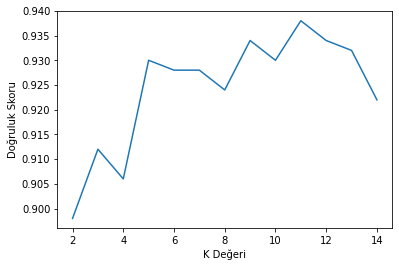

In [64]:
score_list = [] 

for each in range(2,15):
    knn_new = KNeighborsClassifier(n_neighbors = each)
    knn_new.fit(X_train, Y_train)
    score_list.append(knn_new.score(X_test, Y_test))

plt.plot(range(2,15),score_list)
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk Skoru")
plt.show()

#Gözlemlendiği üzere model skoru komşu sayısına göre değişmektedir.

KNN Modeli için karmaşıklık matrisimiz

In [65]:
con_matrix = confusion_matrix(Y_test, Y_pred)
print(con_matrix)

[[119   5   7   0]
 [  8 105   0   0]
 [  4   0 115   8]
 [  0   0   3 126]]


Kesinlik, Duyarlılık ve F1 Skorlarını görünteleyelim

In [66]:
precision_score(Y_test, Y_pred, average='weighted')


0.930004287652646

In [67]:
recall_score(Y_test, Y_pred, average='weighted')

0.93

In [68]:
f1_score(Y_test, Y_pred, average = 'weighted') 

0.9298596344083053

Raporumuzu görüntülüyelim

In [69]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       131
           1       0.95      0.93      0.94       113
           2       0.92      0.91      0.91       127
           3       0.94      0.98      0.96       129

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



> **Tüm modelleri ve başarı oranlarını göz önünde bulundurduğumuzda En doğru sonucu veren modelimiz KNN Modeli olmuştur.
> Daha sonrasında Karar Ağacı ve Naive Bayes gelmektedir.**